# Introduction

### Prologue

Welcome to the Computer Vision Assignment Nagar (CVAN), where everyone has to solve some set of problems to go from location A to location B. There are total 5 places (A, B, C, D, E) in the CVAN with equally distributed rewards.
<br/><br/>
After visiting all the 5 places you will able to reach a glorious palce ResultPura (RP).
<br/><br/>
Prof. Shanmuganathan Raman is Time Variant Authority (TVA) of this universe, if found you copying the assignment or exam or any malpractice then instead of reaching ResultPura you will reach ZeroPura.
<br/><br/>
<b>Special fact about CVAN is you have to solve everything with some vision algorithm.</b>

### Task

You are currently at place A. Your task is to solve series of questions given below which will lead you to the final task of solving a JigSaw puzzle mystery. Someone has altered the reality of CVAN and makes changes in the vision algorithm of the brain and because of it everyone is now observing real world as jigsaw images in their vision and causing chaos in their daily life.
<br/><br/>
<b>Note: Only you can save them by not copying the assignment from others and but you can discuss with your friends.</b>

# Task

### Pre-defined code

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

# Downloading all the required libraries


# Importing all the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
from glob import glob
from natsort import natsorted
from tqdm import tqdm
style.use('ggplot')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading all the images in the drive
gt_images = []

for files in tqdm(natsorted(glob('/content/drive/My Drive/ES666CV/Images/A/*'))):
    gt_images.append(cv2.imread(files, 1))

gt_images = np.array(gt_images) # Only possible because all images are of same size

100%|██████████| 4/4 [00:00<00:00, 151.06it/s]


In [ ]:
def show_image_grid(images, M, N, title='Title'):
    # Assuming 'images' is a numpy array of shape (num_images, height, width, channels)
    fig, axes = plt.subplots(M, N, figsize=(N * 2, M * 2))

    if len(images.shape) < 4:
        images = np.expand_dims(images.copy(), axis=0)

    fig.suptitle(title)
    for i in range(M):
        for j in range(N):
            if M==1 and N==1:
                ax = axes
            elif M == 1 or N==1:
                ax = axes[max(i, j)]
            else:
                ax = axes[i, j]
            index = i * N + j
            if index < images.shape[0]:
                ax.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
            ax.axis('off')
    plt.tight_layout()
    plt.show()

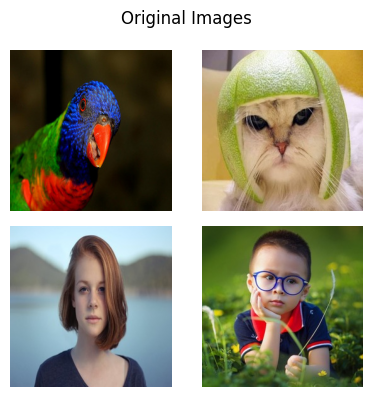

In [ ]:
show_image_grid(gt_images, 2, 2, 'Original Images')

### Q1 [2 Marks]

Given some set of images, you have to add two different kind of noises to it.
* Impulse noise (Salt and Pepper noise)
* Gaussian noise

<br/>
<b>Note: Implement all the noise addition algorithm from scratch.</b> You can use numpy library for convolution and other methods.
<br/><br/>
Add noises in small amount so that not all the information in image is changes.
<br/><br/>
Also please vary the parameters of noise and display images accordingly.

In [ ]:
def add_impulse_noise(image, noise_prob):
    # Impulse Noise for Salt and Pepper case
    # In this case white and black noise dominates that is either low or high
    # Here noise_prob is the noise probability which is our parameter that we need to vary in this case
    # Also in case of impule the noise is randomly applied on the certain pixels
    noisy_image= np.copy(image)
    row, col, channels = image.shape
    for i in range(row):
          for j in range(col):
              for k in range(channels):
                  rand_val = np.random.rand()
                  if rand_val < noise_prob / 2:
                      noisy_image[i, j, k] = 0  # pepper noise on this channel
                  elif rand_val > 1 - noise_prob / 2:
                      noisy_image[i, j, k] = 255  # salt noise on this channel


    return noisy_image

def add_gaussian_noise(image, mean, std):
    # In case of Gaussian noise, mean and std are the parameters that needs to be vary for varying the noise
    gaussian_noise=np.random.normal(mean,std,image.shape)
    noisy_image=image+gaussian_noise
    noisy_image=np.clip(noisy_image,0,255)
    return noisy_image.astype(np.uint8)

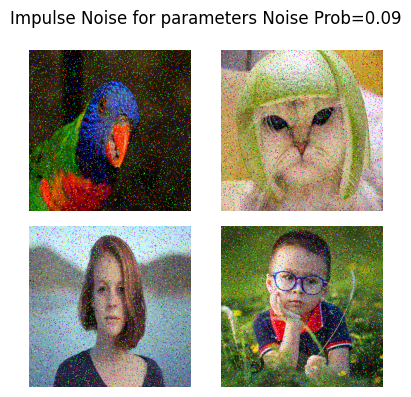

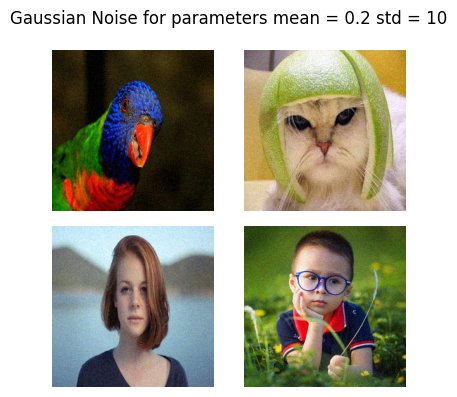

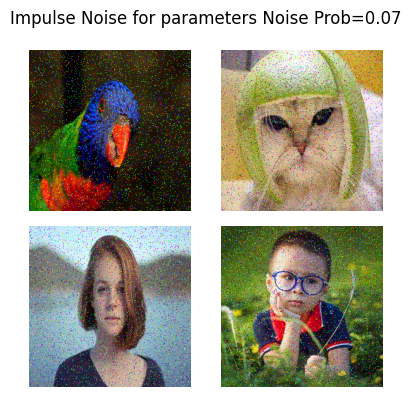

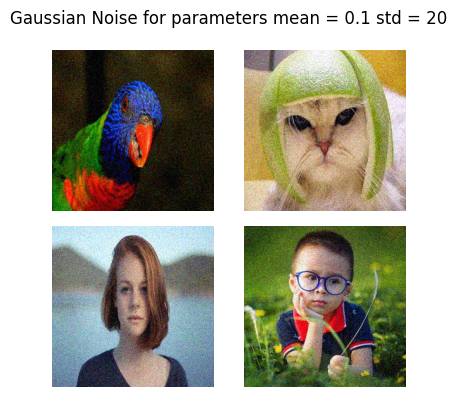

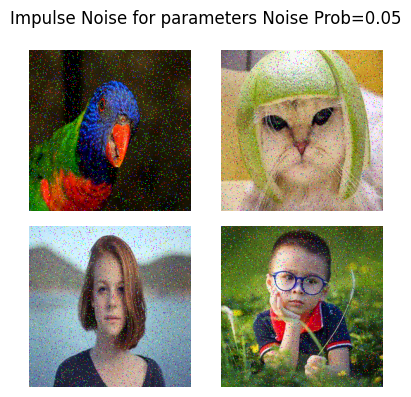

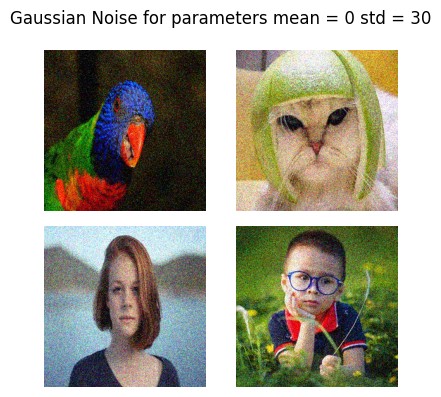

In [ ]:
# we can change the noise_prob , mean and std in order to get different noise
parameters= [[0.09,0.2,10],[0.07,0.1,20],[0.05,0,30]]    #Here i have taken three different parameters
for param in parameters:
  impulse_noisy_images  = []
  gaussian_noisy_images = []
  for image in gt_images:
      impulse_noisy_images.append(add_impulse_noise(image, noise_prob=param[0]))
      gaussian_noisy_images.append(add_gaussian_noise(image, mean=param[1], std=param[2]))

  impulse_noisy_images = np.array(impulse_noisy_images)
  gaussian_noisy_images = np.array(gaussian_noisy_images)

  show_image_grid(impulse_noisy_images, M=2, N=2, title='Impulse Noise for parameters'+' Noise Prob='+ str(param[0]))
  show_image_grid(gaussian_noisy_images, M=2, N=2, title='Gaussian Noise for parameters'+' mean = '+str(param[1])+' std = '+str(param[2]))

### Q2 [3 Marks]

Use three different filtering operations and denoise the noisy images generated in the previous question. You have to use following noises value for this and rest of the question.
<pre>
noise_prob: 0.05 (impulse noise)
gaussian noise: mean = 0, std = 30
</pre>

* Box Filter: Moving Average Filter

[![boxfilter.webp](https://i.postimg.cc/4NtD4Z7k/boxfilter.webp)](https://postimg.cc/9rm816YJ)

* Gaussian Filter

[![gaussian.png](https://i.postimg.cc/Kvy9NTzw/gaussian.png)](https://postimg.cc/NLp7G5Rk)

* Median Filter

[![median.png](https://i.postimg.cc/q704Hqj5/median.png)](https://postimg.cc/NKNW1sh6)



<b>Note: Implement all the filters algorithm from scratch.</b> You can use numpy library for convolution and other methods.

In [ ]:
from scipy.ndimage import convolve
def apply_box_filter(image, kernel_size):
  k = (kernel_size - 1) // 2
  padded_image = np.pad(image, ((k, k), (k, k), (0, 0)), 'constant', constant_values=0)
  blurred_image = np.zeros_like(image)
  for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            blurred_image[i, j] = np.mean(padded_image[i:i + kernel_size, j:j + kernel_size], axis=(0, 1))

  return blurred_image

def gaussian_kernel(size, sigma):

    k = (size - 1) // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    return g / g.sum()

def apply_gaussian_filter(image, kernel_size, sigma):
  kernel = gaussian_kernel(kernel_size, sigma)
  padded_image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2), (0, 0)), 'constant', constant_values=0)
  blurred_image = np.zeros_like(image)


  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          for c in range(3):
              blurred_image[i, j, c] = (padded_image[i:i + kernel_size, j:j + kernel_size, c] * kernel).sum()

  return blurred_image

def apply_median_filter(image, kernel_size):
    k = (kernel_size - 1) // 2
    padded_image = np.pad(image, ((k, k), (k, k), (0, 0)), 'constant', constant_values=0)
    filtered_image = np.zeros_like(image)


    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            filtered_image[i, j] = np.median(padded_image[i:i + kernel_size, j:j + kernel_size], axis=(0, 1))

    return filtered_image

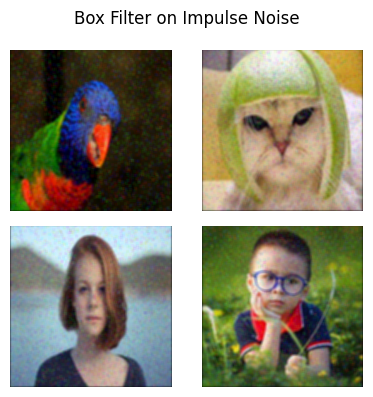

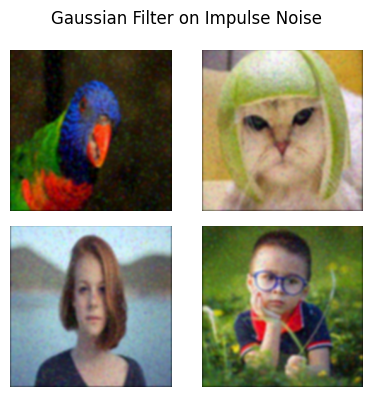

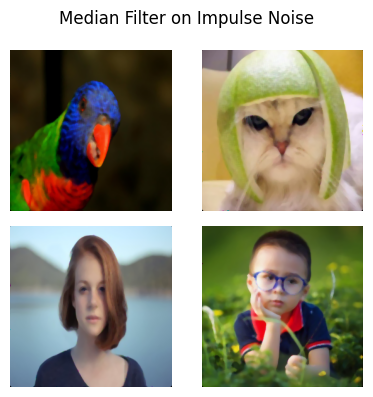

In [ ]:
# The last image that we had was with the parameter noise_prob= 0.5   mean=0  and std = 30

box_filter_images_impulse       = []
gaussian_filter_images_impulse  = []
median_filter_images_impulse    = []

for image in impulse_noisy_images:
    box_filter_images_impulse.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_impulse.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_impulse.append(apply_median_filter(image, kernel_size=5))

box_filter_images_impulse = np.array(box_filter_images_impulse)
gaussian_filter_images_impulse = np.array(gaussian_filter_images_impulse)
median_filter_images_impulse = np.array(median_filter_images_impulse)

show_image_grid(box_filter_images_impulse, M=2, N=2, title='Box Filter on Impulse Noise')
show_image_grid(gaussian_filter_images_impulse, M=2, N=2, title='Gaussian Filter on Impulse Noise')
show_image_grid(median_filter_images_impulse, M=2, N=2, title='Median Filter on Impulse Noise')

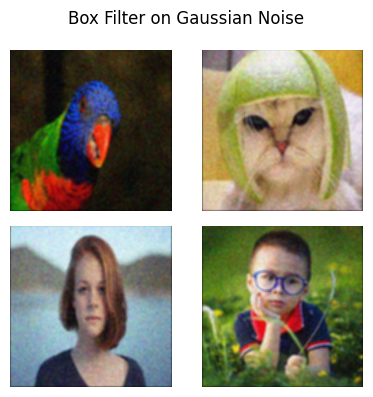

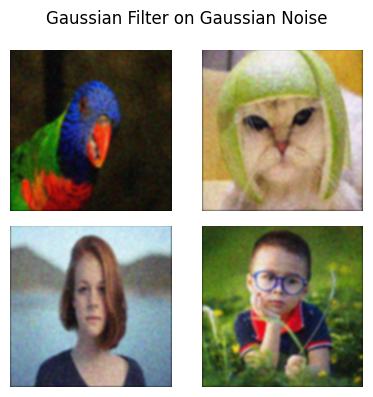

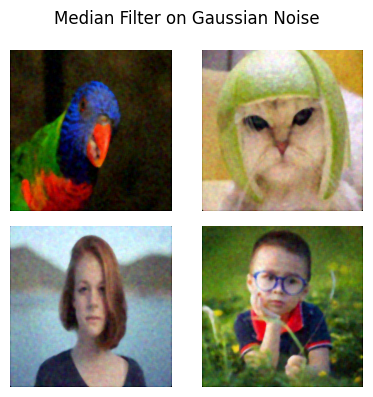

In [ ]:
# Write code here
box_filter_images_gaussian       = []
gaussian_filter_images_gaussian  = []
median_filter_images_gaussian    = []

for image in gaussian_noisy_images:
    box_filter_images_gaussian.append(apply_box_filter(image, kernel_size=5))
    gaussian_filter_images_gaussian.append(apply_gaussian_filter(image, kernel_size=7, sigma=2.0))
    median_filter_images_gaussian.append(apply_median_filter(image, kernel_size=5))

box_filter_images_gaussian = np.array(box_filter_images_gaussian)
gaussian_filter_images_gaussian = np.array(gaussian_filter_images_gaussian)
median_filter_images_gaussian = np.array(median_filter_images_gaussian)

show_image_grid(box_filter_images_gaussian, M=2, N=2, title='Box Filter on Gaussian Noise')
show_image_grid(gaussian_filter_images_gaussian, M=2, N=2, title='Gaussian Filter on Gaussian Noise')
show_image_grid(median_filter_images_gaussian, M=2, N=2, title='Median Filter on Gaussian Noise')

### Q3 [5 Marks]

Implement the Canny Edge Detector algorithm from scratch, you can use numpy library for computation operation such as convolution or sliding windows.
<br/>
Show canny edge results on the following denoised images from previous question:
* box_filter_images_impulse: [4, 256, 256, 3]
* gaussian_filter_images_impulse: [4, 256, 256, 3]
* median_filter_images_impulse: [4, 256, 256, 3]
* box_filter_images_gaussian: [4, 256, 256, 3]
* gaussian_filter_images_gaussian: [4, 256, 256, 3]
* median_filter_images_gaussian: [4, 256, 256, 3]

Total number of images in each of above array is: 4 <br/>
Each is of size H: 256, W: 256 and Channels: 3 <br/><br/>
Compare your implementation with Opencv canny edge detector method.<br/><br/>
Create a table of 6 x 4 (where 6 is all the filters and 4 is number of images) and show Root Mean Square Error between your canny edge image and opencv canny edge image.

In [ ]:
def apply_canny_edge_detector_opencv(image, threshold1, threshold2):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1, threshold2)

    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges

Helper functions for canny edge detector

In [ ]:
def Gradient_Sobel_Operator(gray_image):

    grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)   # gradients in x
    grad_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)   # gradients in y


    gradient_mag = np.sqrt(grad_x**2 + grad_y**2)
    gradient_dir = np.arctan2(grad_y, grad_x) * 180 / np.pi
    gradient_dir[gradient_dir < 0] += 180

    return gradient_mag, gradient_dir

def Non_max_suppression(gradient_mag, gradient_dir):
    h, w = gradient_mag.shape
    resultant_image = np.zeros_like(gradient_mag, dtype=np.float32)

    angle = gradient_dir

    for i in range(1, h-1):
        for j in range(1, w-1):
            mag = gradient_mag[i, j]
            ang = angle[i, j]

            if (0 <= ang < 22.5) or (157.5 <= ang < 180):
                # Horizontal edge
                neighbor1 = gradient_mag[i, j+1]
                neighbor2 = gradient_mag[i, j-1]
            elif (22.5 <= ang < 67.5):
                # Diagonal edge
                neighbor1 = gradient_mag[i-1, j+1]
                neighbor2 = gradient_mag[i+1, j-1]
            elif (67.5 <= ang < 112.5):
                # Vertical edge
                neighbor1 = gradient_mag[i-1, j]
                neighbor2 = gradient_mag[i+1, j]
            else:
                # Diagonal edge
                neighbor1 = gradient_mag[i-1, j-1]
                neighbor2 = gradient_mag[i+1, j+1]

            if mag >= neighbor1 and mag >= neighbor2:
                resultant_image[i, j] = mag

    return resultant_image

def double_threshold(image, low_thresh, high_thresh):

    strong_edges = (image >= high_thresh)
    weak_edges = (image >= low_thresh) & (image < high_thresh)

    result = np.zeros_like(image, dtype=np.uint8)
    result[strong_edges] = 255
    result[weak_edges] = 75

    return result

def edge_tracking_by_hysteresis(threshold_image):

    strong_edges = (threshold_image == 255)
    weak_edges = (threshold_image == 75)

    h, w = threshold_image.shape
    for i in range(1, h-1):
        for j in range(1, w-1):
            if weak_edges[i, j]:
                # Check if there is any strong edge in the neighborhood
                if np.any(strong_edges[i-1:i+2, j-1:j+2]):
                    threshold_image[i, j] = 255
                else:
                    threshold_image[i, j] = 0

    return threshold_image


In [ ]:

def apply_canny_edge_detector_self(image, threshold1, threshold2):

    # First we will convert Image to Gray scale for which we can use BGR2_GRAY
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Now we will calculate the gradient magnitude and gradient direction for which we will be using Sobel operators
    # Here the Gradient_Sobel_Operator will return the gradient magnitude and the direction.

    gradient_mag,gradient_dir=Gradient_Sobel_Operator(gray_image)

    # Now we will be using the Non-maximum suppression which helps refine this by eliminating the weaker pixels that
    # do not form part of a stronger edge. This step ensures that only the local maxima, i.e., the strongest edge points in the gradient direction, are retained.
    # The Non_max_suppression takes two parameters i.e gradient magnitude and gradient direction( angle thetha).

    resultant_iamge=Non_max_suppression(gradient_mag,gradient_dir)

    threshold_image=double_threshold(resultant_iamge,threshold1,threshold2)

    edges = edge_tracking_by_hysteresis(threshold_image)


    # This is done only for converting 1 channel image to 3 channels for
    # visualization purpose in matplotlib
    edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    return edges

In [ ]:
threshold1 = 80
threshold2 = 180

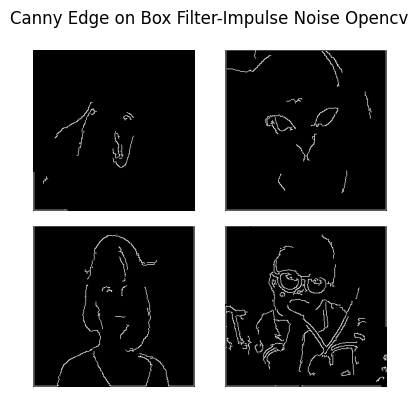

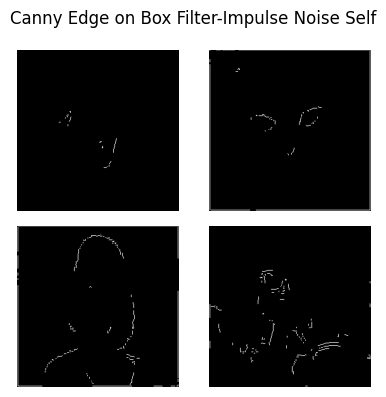

In [ ]:

canny_edge_opencv_box_filter_images_impulse = []
canny_edge_self_box_filter_images_impulse = []

for image in box_filter_images_impulse:
    canny_edge_opencv_box_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_impulse = np.array(canny_edge_opencv_box_filter_images_impulse)
canny_edge_self_box_filter_images_impulse = np.array(canny_edge_self_box_filter_images_impulse)

show_image_grid(canny_edge_opencv_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_impulse, M=2, N=2, title='Canny Edge on Box Filter-Impulse Noise Self')

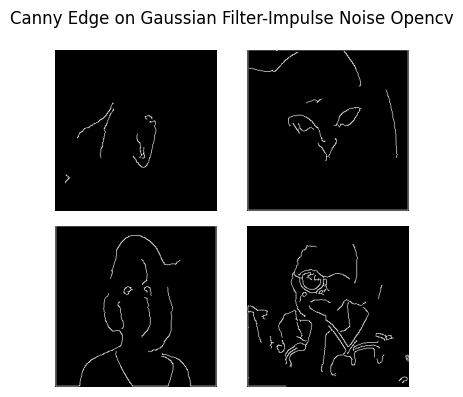

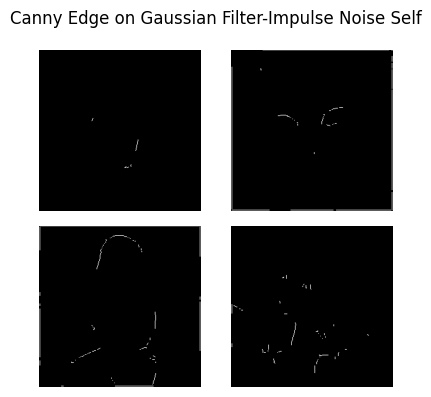

In [ ]:
canny_edge_opencv_gaussian_filter_images_impulse = []
canny_edge_self_gaussian_filter_images_impulse = []

for image in gaussian_filter_images_impulse:
    canny_edge_opencv_gaussian_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_impulse = np.array(canny_edge_opencv_gaussian_filter_images_impulse)
canny_edge_self_gaussian_filter_images_impulse = np.array(canny_edge_self_gaussian_filter_images_impulse)

show_image_grid(canny_edge_opencv_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_impulse, M=2, N=2, title='Canny Edge on Gaussian Filter-Impulse Noise Self')

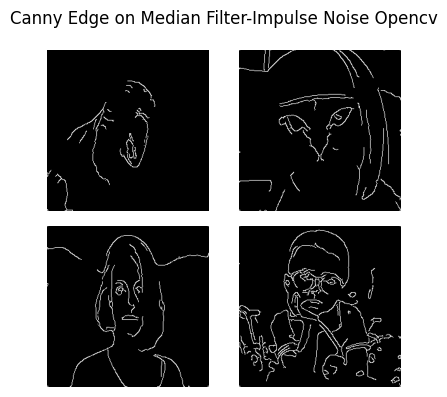

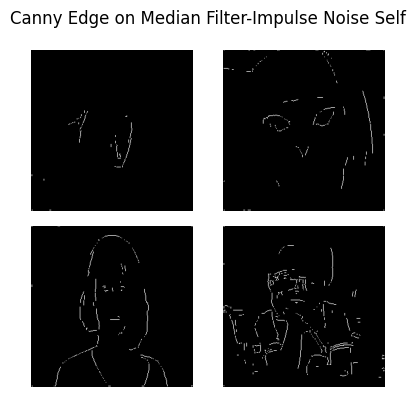

In [ ]:
canny_edge_opencv_median_filter_images_impulse = []
canny_edge_self_median_filter_images_impulse = []

for image in median_filter_images_impulse:
    canny_edge_opencv_median_filter_images_impulse.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_impulse.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_impulse = np.array(canny_edge_opencv_median_filter_images_impulse)
canny_edge_self_median_filter_images_impulse = np.array(canny_edge_self_median_filter_images_impulse)

show_image_grid(canny_edge_opencv_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_impulse, M=2, N=2, title='Canny Edge on Median Filter-Impulse Noise Self')

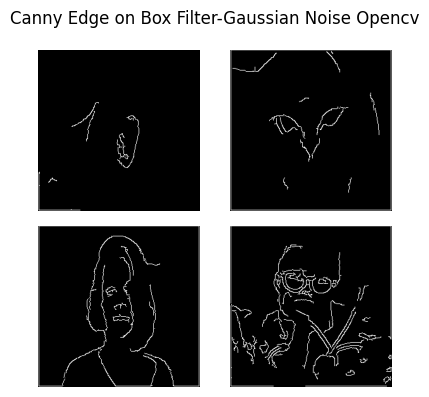

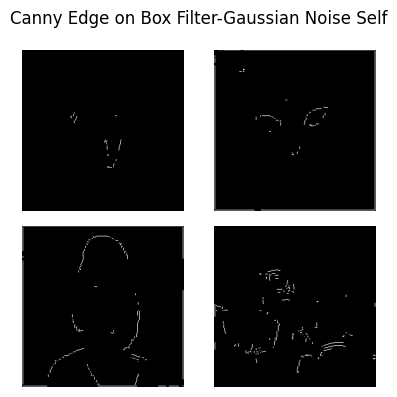

In [ ]:
canny_edge_opencv_box_filter_images_gaussian = []
canny_edge_self_box_filter_images_gaussian = []

for image in box_filter_images_gaussian:
    canny_edge_opencv_box_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_box_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_box_filter_images_gaussian = np.array(canny_edge_opencv_box_filter_images_gaussian)
canny_edge_self_box_filter_images_gaussian = np.array(canny_edge_self_box_filter_images_gaussian)

show_image_grid(canny_edge_opencv_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_box_filter_images_gaussian, M=2, N=2, title='Canny Edge on Box Filter-Gaussian Noise Self')

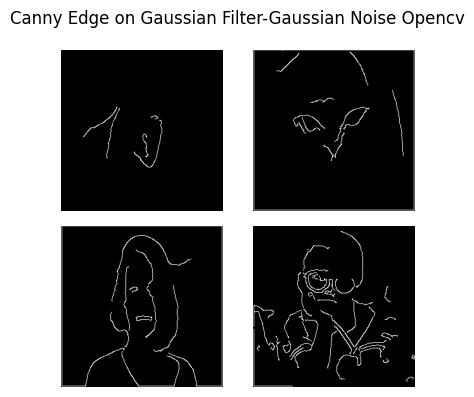

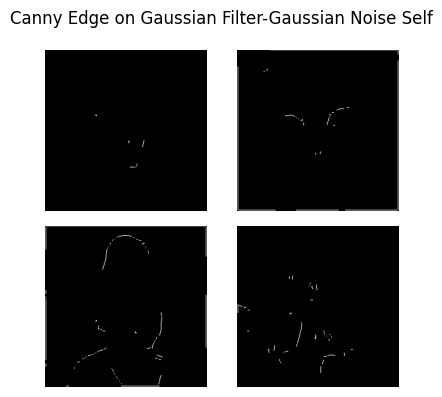

In [ ]:
canny_edge_opencv_gaussian_filter_images_gaussian = []
canny_edge_self_gaussian_filter_images_gaussian = []

for image in gaussian_filter_images_gaussian:
    canny_edge_opencv_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_gaussian_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_gaussian_filter_images_gaussian = np.array(canny_edge_opencv_gaussian_filter_images_gaussian)
canny_edge_self_gaussian_filter_images_gaussian = np.array(canny_edge_self_gaussian_filter_images_gaussian)

show_image_grid(canny_edge_opencv_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_gaussian_filter_images_gaussian, M=2, N=2, title='Canny Edge on Gaussian Filter-Gaussian Noise Self')

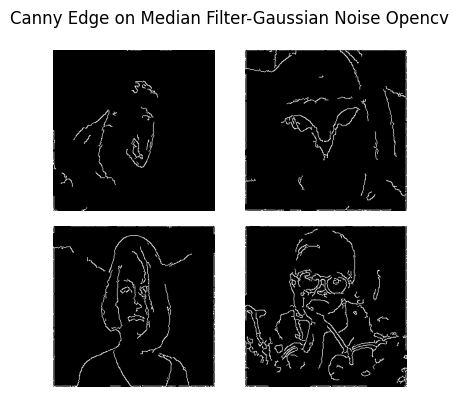

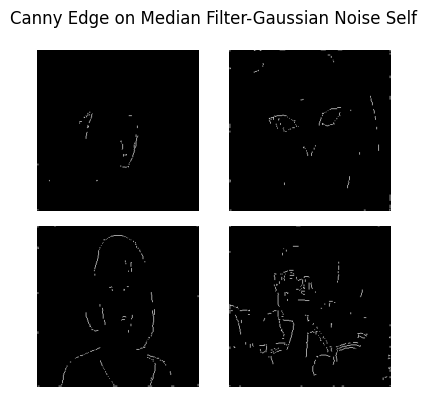

In [ ]:
canny_edge_opencv_median_filter_images_gaussian = []
canny_edge_self_median_filter_images_gaussian = []

for image in median_filter_images_gaussian:
    canny_edge_opencv_median_filter_images_gaussian.append(apply_canny_edge_detector_opencv(image, threshold1=threshold1, threshold2=threshold2))
    canny_edge_self_median_filter_images_gaussian.append(apply_canny_edge_detector_self(image, threshold1=threshold1, threshold2=threshold2))

canny_edge_opencv_median_filter_images_gaussian = np.array(canny_edge_opencv_median_filter_images_gaussian)
canny_edge_self_median_filter_images_gaussian = np.array(canny_edge_self_median_filter_images_gaussian)

show_image_grid(canny_edge_opencv_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Opencv')
show_image_grid(canny_edge_self_median_filter_images_gaussian, M=2, N=2, title='Canny Edge on Median Filter-Gaussian Noise Self')

In [ ]:
####
# RMSE table of size 6 x 4
###
def calculate_rmse(image1, image2):
    # Calculate the RMSE between two images
    return np.sqrt(np.mean((image1 - image2) ** 2))


In [ ]:
image_sets = [
    ('Box Filter - Impulse Noise', canny_edge_opencv_box_filter_images_impulse, canny_edge_self_box_filter_images_impulse),
    ('Gaussian Filter - Impulse Noise', canny_edge_opencv_gaussian_filter_images_impulse, canny_edge_self_gaussian_filter_images_impulse),
    ('Median Filter - Impulse Noise', canny_edge_opencv_median_filter_images_impulse, canny_edge_self_median_filter_images_impulse),
    ('Box Filter - Gaussian Noise', canny_edge_opencv_box_filter_images_gaussian, canny_edge_self_box_filter_images_gaussian),
    ('Gaussian Filter - Gaussian Noise', canny_edge_opencv_gaussian_filter_images_gaussian, canny_edge_self_gaussian_filter_images_gaussian),
    ('Median Filter - Gaussian Noise', canny_edge_opencv_median_filter_images_gaussian, canny_edge_self_median_filter_images_gaussian)
]

rmse_table = []


for filter_name, opencv_images, self_images in image_sets:
    rmse_values = []
    for opencv_image, self_image in zip(opencv_images, self_images):
        rmse = calculate_rmse(opencv_image, self_image)
        rmse_values.append(rmse)
    rmse_table.append(rmse_values)


print("Root Mean Square Error between your canny edge image and opencv canny edge image.")
print("")
print(f"{'Filter Name':<40}{'Image 1':<10}{'Image 2':<10}{'Image 3':<10}{'Image 4':<10}")
for (filter_name, rmse_values) in zip([name for name, _, _ in image_sets], rmse_table):
    print(f"{filter_name:<40}{rmse_values[0]:<10.4f}{rmse_values[1]:<10.4f}{rmse_values[2]:<10.4f}{rmse_values[3]:<10.4f}")


Root Mean Square Error between your canny edge image and opencv canny edge image.

Filter Name                             Image 1   Image 2   Image 3   Image 4   
Box Filter - Impulse Noise              0.0929    0.1151    0.1293    0.2283    
Gaussian Filter - Impulse Noise         0.0803    0.1110    0.1382    0.1868    
Median Filter - Impulse Noise           0.1121    0.1607    0.1394    0.2080    
Box Filter - Gaussian Noise             0.0891    0.1074    0.1435    0.2277    
Gaussian Filter - Gaussian Noise        0.0765    0.1122    0.1449    0.1904    
Median Filter - Gaussian Noise          0.1199    0.1857    0.1899    0.2397    


From the RMSE difference we can say that OpenCV Canny's edge detector is better. Reason for this difference is the fine tuning of various parameters. In our case we were given lower and higher threshold values prior. But in case of Open CV's implementation there might be a pipeline to get best threshold values. Also the gaussian blur in oven CV might be using better Std and mean value in order to reduce the noise. Thus tuning of parameters is the main difference that we are getting RMSE difference.

We can also observe that for image1 the RMSE difference is less because OpenCV is also not able to detect edges.